In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [30]:
CompanyInfo = (pd.read_csv("https://raw.githubusercontent.com/Davidfdaf/Optimization-modeling-course/main/Additional_info.csv")
               .rename(columns={'Unnamed: 0':'CUSIP'}).set_index('CUSIP'))
AvailabilitySeries = (pd.read_csv("https://raw.githubusercontent.com/Davidfdaf/Optimization-modeling-course/main/Availability_series.csv")
                      .rename(columns={'Unnamed: 0':'CUSIP'}).set_index('CUSIP'))
PriceSeries = (pd.read_csv("https://raw.githubusercontent.com/Davidfdaf/Optimization-modeling-course/main/Price_series.csv")
               .rename(columns={'Unnamed: 0':'CUSIP'}).set_index('CUSIP'))
YTWSeries = (pd.read_csv("https://raw.githubusercontent.com/Davidfdaf/Optimization-modeling-course/main/YTW_series.csv")
             .rename(columns={'Unnamed: 0':'CUSIP'}).set_index('CUSIP'))
MinQntySeries = (pd.read_csv("https://raw.githubusercontent.com/Davidfdaf/Optimization-modeling-course/main/minimum_qty.csv")
                 .rename(columns={'Unnamed: 0':'CUSIP'}).set_index('CUSIP'))


directory = "/Users/davidfitzpatrick/Desktop/Optimization/OneDrive"
m = "Weekly List all 08-10-21.xlsm"
m_1 = "Weekly List all 02-08-22.xlsm"
additional_data = pd.read_excel(directory+'/'+m, sheet_name="Bloomberg",header=0)[['CUSIP','Industry']]
add_dta2 = pd.read_excel(directory+'/'+m_1, sheet_name="Bloomberg",header=0)[['CUSIP','Industry']]

cusipw1 = set(additional_data.loc[additional_data['CUSIP'].isin(PriceSeries.index),'CUSIP'])
cusipw2 = set(add_dta2.loc[add_dta2['CUSIP'].isin(PriceSeries.index),'CUSIP'])
CUSIPs = cusipw1.union(cusipw2)
combined = pd.concat([additional_data.loc[additional_data['CUSIP'].isin(PriceSeries.index),:],\
          add_dta2.loc[add_dta2['CUSIP'].isin(PriceSeries.index),:]]).drop_duplicates()

In [31]:
sectors = combined['Industry'].value_counts().index
IndustryInfo = combined[combined['Industry'].isin(sectors)].set_index('CUSIP')
CompanyInfo = CompanyInfo.loc[CompanyInfo.index.isin(IndustryInfo.index),:]
AvailabilitySeries = AvailabilitySeries.loc[AvailabilitySeries.index.isin(IndustryInfo.index),:]
PriceSeries = PriceSeries.loc[PriceSeries.index.isin(IndustryInfo.index),:]
YTWSeries = YTWSeries.loc[YTWSeries.index.isin(IndustryInfo.index),:]
MinQntySeries = MinQntySeries.loc[MinQntySeries.index.isin(IndustryInfo.index),:]
all_company_info = CompanyInfo.merge(IndustryInfo, left_index=True, right_index=True).drop(['Underlying','Market','Type'],axis=1)
corr = PriceSeries.T.corr()

/opt/homebrew/Caskroom/miniforge/base/envs/tfenv/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 864x576 with 0 Axes>

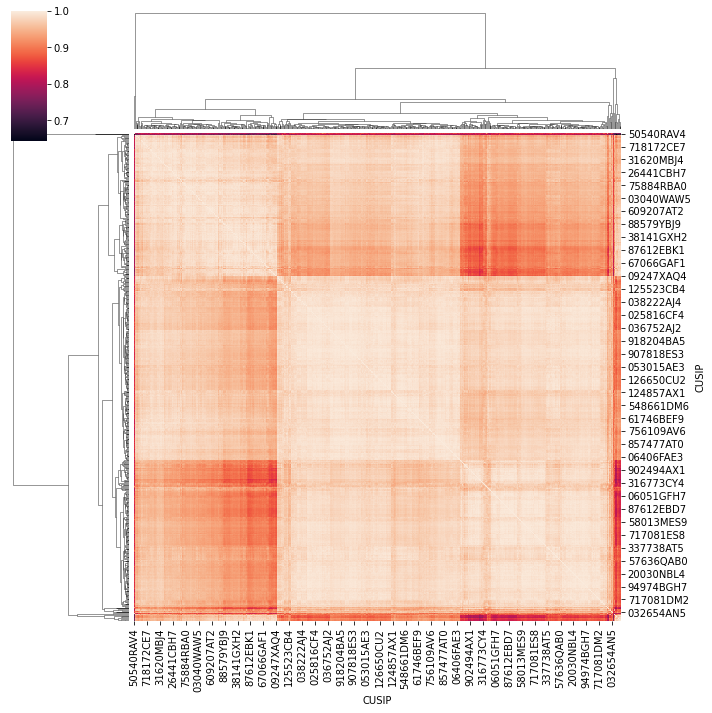

In [38]:
plt.figure(figsize=(12,8))
sns.clustermap(corr)

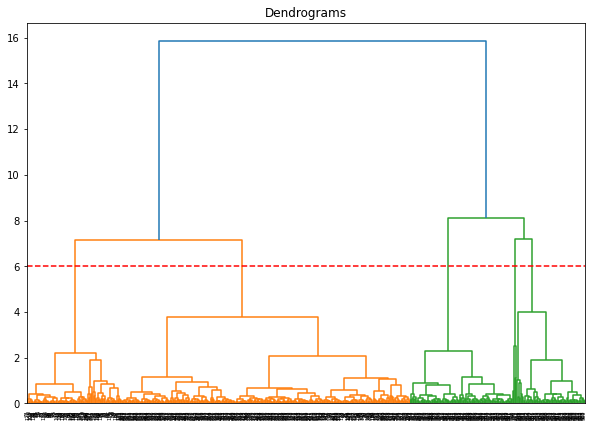

In [39]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(corr, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [40]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
kclusters = cluster.fit_predict(corr)
all_company_info['5cluster'] = kclusters

In [41]:
all_company_info.dtypes

Description     object
Rating          object
Coupon         float64
Maturity        object
Next Call       object
Industry        object
5cluster         int64
dtype: object

In [42]:
#coupons are indistinguishable between clusters
#n=4
#print(all_company_info.loc[all_company_info['5cluster']==n,all_company_info.columns[1:-1]]['Coupon'].mean())
#all_company_info.loc[all_company_info['5cluster']==n,all_company_info.columns[1:-1]]['Coupon'].std()

In [51]:
all_company_info.loc[all_company_info.loc[all_company_info['5cluster']==n,all_company_info.columns[1:-1]].index]

,Description,Rating,Coupon,Maturity,Next Call,Industry,5cluster
CUSIP,,,,,,,
12572QAG0,CME GROUP INC. ...,Aa3/AA-,3.000,2025-03-15,C 12/24@ 100,Financials,2
857477AW3,STATE STREET CORPORATION ...,A1/A,2.650,2026-05-19,NaN,Financials,2
03076CAH9,"AMERIPRISE FINANCIAL, INC. ...",A3/A-,2.875,2026-09-15,C 6/26@ 100,Financials,2
10112RAY0,BOSTON PROPERTIES LIMITED PARTNERSHIP ...,Baa1/BBB+,2.750,2026-10-01,C 7/26@ 100,Real Estate,2
001055AQ5,AFLAC INCORPORATED ...,A3/A-,2.875,2026-10-15,C 7/26@ 100,Financials,2
...,...,...,...,...,...,...,...
78486QAE1,SVB FINANCIAL GROUP ...,A3/BBB,3.125,2030-06-05,C 3/30@ 100,Financials,2
29364GAL7,ENTERGY CORPORATION ...,Baa2/BBB,2.800,2030-06-15,C 3/30@ 100,Utilities,2
75884RBA0,"REGENCY CENTERS, L.P. ...",Baa1/BBB+,3.700,2030-06-15,C 3/30@ 100,Real Estate,2


In [49]:
n=2
all_company_info.loc[all_company_info['5cluster']==n,all_company_info.columns[1:-1]].index#['Industry'].value_counts()

,Rating,Coupon,Maturity,Next Call,Industry
CUSIP,,,,,
12572QAG0,Aa3/AA-,3.000,2025-03-15,C 12/24@ 100,Financials
857477AW3,A1/A,2.650,2026-05-19,NaN,Financials
03076CAH9,A3/A-,2.875,2026-09-15,C 6/26@ 100,Financials
10112RAY0,Baa1/BBB+,2.750,2026-10-01,C 7/26@ 100,Real Estate
001055AQ5,A3/A-,2.875,2026-10-15,C 7/26@ 100,Financials
...,...,...,...,...,...
78486QAE1,A3/BBB,3.125,2030-06-05,C 3/30@ 100,Financials
29364GAL7,Baa2/BBB,2.800,2030-06-15,C 3/30@ 100,Utilities
75884RBA0,Baa1/BBB+,3.700,2030-06-15,C 3/30@ 100,Real Estate
